In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from glob import glob
import PIL
from sklearn.metrics import confusion_matrix
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPool2D,BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import tensorflow as tf

In [3]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


In [4]:
metadata = pd.read_csv("/kaggle/input/skin-cancer-dataset/HAM10000_metadata.csv")

In [5]:

metadata.drop(['lesion_id','dx_type','age','sex','localization'],axis = 1,inplace = True)
metadata.head(5)

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl


In [6]:
metadata.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [7]:
le = LabelEncoder()
metadata['dx'] = le.fit_transform(metadata.dx)

In [8]:
df1 = metadata[metadata.dx==0]
df2 = metadata[metadata.dx==1]
df3 = metadata[metadata.dx==2]
df4 = metadata[metadata.dx==3]
df5 = metadata[metadata.dx==4]
df6 = metadata[metadata.dx==5]
df7 = metadata[metadata.dx==6]

In [9]:
samples = 200
df1_balanced = resample(df1,replace = True,n_samples = samples,random_state = 2)
df2_balanced = resample(df2,replace = True,n_samples = samples,random_state = 2)
df3_balanced = resample(df3,replace = True,n_samples = samples,random_state = 2)
df4_balanced = resample(df4,replace = True,n_samples = samples,random_state = 2)
df5_balanced = resample(df5,replace = True,n_samples = samples,random_state = 2)
df6_balanced = resample(df6,replace = True,n_samples = samples,random_state = 2)
df7_balanced = resample(df7,replace = True,n_samples = samples,random_state = 2)

In [10]:
merged = pd.concat([df1_balanced,df2_balanced,df3_balanced,
                  df4_balanced,df5_balanced,df6_balanced,df7_balanced])

In [11]:
dir = "/kaggle/input/skin-cancer-dataset/Skin Cancer/Skin Cancer"
id = [x.split('.')[0] for x in os.listdir(dir)]
image_path = {x:os.path.join(dir,f'{x}.jpg') for x in id}

In [12]:
metadata['path'] = metadata.image_id.map(image_path.get)

In [13]:
import PIL
from PIL import Image as img

In [14]:
metadata['image'] = metadata.path.map(lambda x:np.asarray(img.open(x).resize((80,80))))

In [15]:
metadata.drop(['image_id','path'],axis = 1,inplace = True)

In [16]:
metadata['image'] = metadata.image.apply(lambda x: x/255)

In [17]:
x = np.asarray(metadata['image'].tolist())
y = to_categorical(metadata['dx'],num_classes = 7)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 4)

In [18]:
num_classes = 7
size = 80
model = Sequential()
model.add(Conv2D(256,(3,3), activation = "relu", input_shape = (size, size,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(7,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        7

In [19]:
model.compile(loss  = 'categorical_crossentropy', optimizer = 'Adam', metrics = 'acc')
batch_size = 16
epochs = 50
history = model.fit(x_train, y_train,epochs = epochs, batch_size= batch_size,
                   validation_data = (x_test,y_test), verbose = 2)
model.evaluate(x_test,y_test)

Epoch 1/50
470/470 - 293s - loss: 1.0297 - acc: 0.6682 - val_loss: 0.9597 - val_acc: 0.6653
Epoch 2/50
470/470 - 292s - loss: 0.9461 - acc: 0.6761 - val_loss: 0.8961 - val_acc: 0.6837
Epoch 3/50
470/470 - 292s - loss: 0.9065 - acc: 0.6799 - val_loss: 0.9580 - val_acc: 0.6565
Epoch 4/50
470/470 - 290s - loss: 0.8939 - acc: 0.6882 - val_loss: 0.8818 - val_acc: 0.6873
Epoch 5/50
470/470 - 290s - loss: 0.8631 - acc: 0.6966 - val_loss: 0.8716 - val_acc: 0.7017
Epoch 6/50
470/470 - 290s - loss: 0.8366 - acc: 0.7014 - val_loss: 0.8771 - val_acc: 0.6857
Epoch 7/50
470/470 - 291s - loss: 0.8047 - acc: 0.7116 - val_loss: 0.8328 - val_acc: 0.7077
Epoch 8/50
470/470 - 290s - loss: 0.7631 - acc: 0.7220 - val_loss: 0.7927 - val_acc: 0.7145
Epoch 9/50
470/470 - 292s - loss: 0.7391 - acc: 0.7253 - val_loss: 0.7781 - val_acc: 0.7165
Epoch 10/50
470/470 - 291s - loss: 0.7156 - acc: 0.7329 - val_loss: 0.7852 - val_acc: 0.7065
Epoch 11/50
470/470 - 290s - loss: 0.7037 - acc: 0.7377 - val_loss: 0.7588 - va

[0.8188446164131165, 0.7260383367538452]

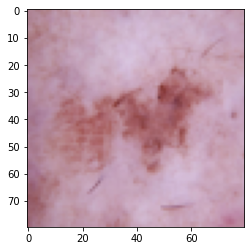

In [20]:
plt.imshow(x_test[0])

In [21]:
p = x_test[42].reshape([1,80,80,3])

In [22]:
print([round(x,3) for x in model.predict(p)[0]])
print(y_test[42])

[0.114, 0.363, 0.192, 0.098, 0.014, 0.205, 0.014]
[0. 1. 0. 0. 0. 0. 0.]


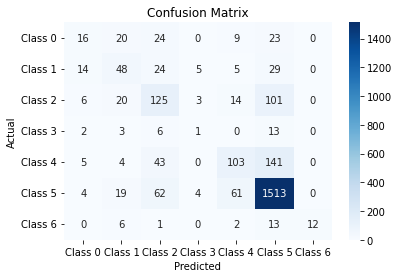

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

class_labels = ["Class 0", "Class 1", "Class 2", "Class 3","Class 4","Class 5","Class 6"]


sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()